In [12]:
import numpy as np

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

In [6]:
img_rows, img_cols = 28, 28

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
K.image_data_format()

'channels_last'

In [9]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [13]:
np.random.seed(5)

In [14]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 209s 3ms/step - loss: 0.2554 - acc: 0.9212 - val_loss: 0.0603 - val_acc: 0.9811
Epoch 2/12
60000/60000 [==============================] - 225s 4ms/step - loss: 0.0866 - acc: 0.9745 - val_loss: 0.0507 - val_acc: 0.9831
Epoch 3/12
60000/60000 [==============================] - 219s 4ms/step - loss: 0.0665 - acc: 0.9803 - val_loss: 0.0331 - val_acc: 0.9887
Epoch 4/12
60000/60000 [==============================] - 229s 4ms/step - loss: 0.0538 - acc: 0.9838 - val_loss: 0.0300 - val_acc: 0.9899
Epoch 5/12
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0461 - acc: 0.9859 - val_loss: 0.0291 - val_acc: 0.9893
Epoch 6/12
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0412 - acc: 0.9880 - val_loss: 0.0289 - val_acc: 0.9905
Epoch 7/12
60000/60000 [==============================] - 289s 5ms/step - loss: 0.0379 - acc: 0.9880 - val_loss: 0.0308 - 

In [24]:
x_test[1].shape

(28, 28, 1)

In [25]:
rs=x_test[1].reshape(28,28)

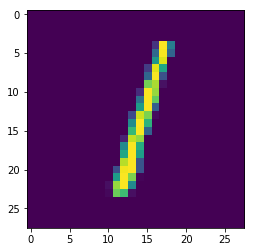

In [31]:
plt.imshow(rs)

In [29]:
model.predict(x_test[1:3])

array([[2.11841211e-08, 4.94949177e-07, 9.99999523e-01, 4.39347864e-11,
        2.47042339e-12, 3.67427858e-15, 3.88051440e-08, 1.57776299e-12,
        1.38849175e-11, 1.58043365e-13],
       [2.48761844e-10, 9.99999642e-01, 1.40089833e-08, 2.30020881e-11,
        1.00019449e-07, 2.58348054e-09, 3.88212875e-08, 2.72919408e-07,
        8.83400642e-09, 4.51048698e-10]], dtype=float32)

In [30]:
rs=x_test[2].reshape(28,28)